In [119]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import plotly.express as px

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [347]:
#read accepted data
df_acp = pd.read_csv('Lending_Club_Accepted_2014_2018.csv')
df_acp['dti_cat'] = pd.cut(df_acp['dti'], 
                           bins=[0,40,100,1000], 
                           labels=["<40", "40-100","100-1000"])
df_acp['issue_d'] = pd.to_datetime(df_acp['issue_d'])
df_acp['year'] = pd.DatetimeIndex(df_acp['issue_d']).year
df_acp['quarter'] = pd.DatetimeIndex(df_acp['issue_d']).quarter
df_acp['Zip_Code'] = df_acp['zip_code'].apply(lambda x: str(x)[:3])
df_acp = df_acp[['id', 'loan_amnt', 'funded_amnt', 'loan_status', 'int_rate', 'grade', 'sub_grade', 'emp_length' , 'annual_inc',
                    'issue_d', 'Zip_Code', 'addr_state', 'year', 'purpose', 'desc', 'quarter']]
df_acp.head()

/var/folders/zx/f9brkgk91s7cwmn105cp0sv80000gn/T/ipykernel_38010/2697318001.py:2: DtypeWarning:

Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.



,id,loan_amnt,funded_amnt,loan_status,int_rate,grade,sub_grade,emp_length,annual_inc,issue_d,Zip_Code,addr_state,year,purpose,desc,quarter
0,68407277,3600.0,3600.0,Fully Paid,13.99,C,C4,10+ years,55000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,4
1,68355089,24700.0,24700.0,Fully Paid,11.99,C,C1,10+ years,65000.0,2015-12-01,577,SD,2015,small_business,NaN,4
2,68341763,20000.0,20000.0,Fully Paid,10.78,B,B4,10+ years,63000.0,2015-12-01,605,IL,2015,home_improvement,NaN,4
3,66310712,35000.0,35000.0,Current,14.85,C,C5,10+ years,110000.0,2015-12-01,076,NJ,2015,debt_consolidation,NaN,4
4,68476807,10400.0,10400.0,Fully Paid,22.45,F,F1,3 years,104433.0,2015-12-01,174,PA,2015,major_purchase,NaN,4


In [103]:
sum(df_acp[df_acp['year'] == 2014]['funded_amnt'])

3503840175.0

In [37]:
#read demographics data
demo = pd.read_csv('demographic_cleaned.csv')
demo['Zip_Code'] = demo['zip3'].apply(lambda x: str(x)[:3])
demo.head()

,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,Zip_Code
0,2013,AL,350.0,57290.184729,0.353635,0.033399,0.605108,0.364532,350
1,2013,AL,351.0,57312.860390,0.421751,0.026525,0.546419,0.370130,351
2,2013,AL,352.0,57312.860390,0.421751,0.026525,0.546419,0.370130,352
3,2013,AL,354.0,55697.014493,0.443769,0.030395,0.519757,0.376812,354
4,2013,AL,359.0,57218.918367,0.159091,0.053030,0.772727,0.346939,359


In [38]:
demo[demo['zip3'] == 190]

,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,Zip_Code
376,2013,PA,190.0,68668.919355,0.263816,0.046403,0.674140,0.349462,190
835,2014,PA,190.0,71946.482877,0.210800,0.060228,0.708723,0.372603,190
1358,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,190
1838,2016,PA,190.0,75203.750385,0.218377,0.081146,0.670048,0.420647,190
2292,2017,PA,190.0,74357.339655,0.220294,0.084780,0.655541,0.387931,190
2746,2018,PA,190.0,75204.925090,0.214434,0.072866,0.688411,0.411552,190


In [39]:
#read population data
df_pop = pd.read_csv('population_by_zip_2010.csv')
df_pop['Zip_Code'] = df_pop['zipcode'].apply(lambda x: str(x)[:3])
                                            
df_pop.head()

,population,minimum_age,maximum_age,gender,zipcode,geo_id,Zip_Code
0,50,30.0,34.0,female,61747,8600000US61747,617
1,5,85.0,NaN,male,64120,8600000US64120,641
2,1389,30.0,34.0,male,95117,8600000US95117,951
3,231,60.0,61.0,female,74074,8600000US74074,740
4,56,0.0,4.0,female,58042,8600000US58042,580


In [40]:
df_popgrp = df_pop.groupby(['Zip_Code']).agg( { 'Zip_Code':'first', 'population':sum } )
df_popgrp.reset_index(drop=True, inplace =True)

In [41]:
df_popgrp.head()

,Zip_Code,population
0,100,4741269
1,101,273228
2,102,239610
3,103,1516809
4,104,4267080


In [44]:
df_demo = pd.merge(demo, df_popgrp, how = 'inner', on = ['Zip_Code'])
df_demo['year'] = df_demo['YEAR']
df_demo.head()

,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,Zip_Code,population,year
0,2013,AL,350.0,57290.184729,0.353635,0.033399,0.605108,0.364532,350,1326570,2013
1,2014,AL,350.0,56019.289474,0.379381,0.016495,0.593814,0.294737,350,1326570,2014
2,2015,AL,350.0,73053.511364,0.347826,0.030435,0.586957,0.431818,350,1326570,2015
3,2013,AL,351.0,57312.860390,0.421751,0.026525,0.546419,0.370130,351,974319,2013
4,2014,AL,351.0,58598.543624,0.423398,0.008357,0.565460,0.322148,351,974319,2014


In [348]:
df_acpdemo = pd.merge(df_acp, df_demo, how = 'inner', on = [ 'year', 'Zip_Code' ] )
df_acpdemo.head()

,id,loan_amnt,funded_amnt,loan_status,int_rate,grade,sub_grade,emp_length,annual_inc,issue_d,Zip_Code,addr_state,year,purpose,desc,quarter,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,population
0,68407277,3600.0,3600.0,Fully Paid,13.99,C,C4,10+ years,55000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,4,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051
1,68416249,12700.0,12700.0,Fully Paid,17.97,D,D4,3 years,32760.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,4,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051
2,68486599,12000.0,12000.0,Fully Paid,6.49,A,A2,10+ years,65000.0,2015-12-01,190,PA,2015,home_improvement,NaN,4,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051
3,68476147,12000.0,12000.0,Fully Paid,11.48,B,B5,7 years,85000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,4,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051
4,68566142,35000.0,35000.0,Fully Paid,17.97,D,D4,10+ years,150000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,4,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051


In [94]:
group = df_acpdemo.groupby('year').agg({ 'population':sum, 'year':'first'})
group.reset_index(drop=True, inplace =True)
group.rename(columns={'population':'pop_sum'}, inplace=True)
group.head()

,pop_sum,year
0,478939566813,2014
1,870215664420,2015
2,810583076943,2016
3,831994293300,2017
4,925530297375,2018


In [95]:
df_acpdemo = pd.merge(df_acpdemo, group, how = 'inner', on = [ 'year' ] )
df_acpdemo.head()

,id,loan_amnt,funded_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,issue_d,Zip_Code,addr_state,year,purpose,desc,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,population,pop_sum
0,68407277,3600.0,3600.0,13.99,C,C4,10+ years,55000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420
1,68416249,12700.0,12700.0,17.97,D,D4,3 years,32760.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420
2,68486599,12000.0,12000.0,6.49,A,A2,10+ years,65000.0,2015-12-01,190,PA,2015,home_improvement,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420
3,68476147,12000.0,12000.0,11.48,B,B5,7 years,85000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420
4,68566142,35000.0,35000.0,17.97,D,D4,10+ years,150000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420


In [96]:
races = [ 'black', 'white', 'asian' ]
sum_cols = [ 'loan_amnt' ]

for col in sum_cols:
    for race in races:
        df_acpdemo[ race + '_' + col ] = df_acpdemo['is_'+race]*df_acpdemo[col]

for race in races:
    df_acpdemo[ race + '_pop' ] = df_acpdemo['is_'+race]
        
df_acpdemo.head()

,id,loan_amnt,funded_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,issue_d,Zip_Code,addr_state,year,purpose,desc,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,population,pop_sum,black_loan_amnt,white_loan_amnt,asian_loan_amnt,black_pop,white_pop,asian_pop
0,68407277,3600.0,3600.0,13.99,C,C4,10+ years,55000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420,881.392818,2391.512514,242.872688,0.244831,0.664309,0.067465
1,68416249,12700.0,12700.0,17.97,D,D4,3 years,32760.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420,3109.357998,8436.724701,856.800871,0.244831,0.664309,0.067465
2,68486599,12000.0,12000.0,6.49,A,A2,10+ years,65000.0,2015-12-01,190,PA,2015,home_improvement,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420,2937.976061,7971.708379,809.575626,0.244831,0.664309,0.067465
3,68476147,12000.0,12000.0,11.48,B,B5,7 years,85000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420,2937.976061,7971.708379,809.575626,0.244831,0.664309,0.067465
4,68566142,35000.0,35000.0,17.97,D,D4,10+ years,150000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN,2015,PA,190.0,74320.007746,0.244831,0.067465,0.664309,0.370423,3762051,870215664420,8569.096844,23250.816104,2361.262242,0.244831,0.664309,0.067465


In [291]:
df_plot = df_acpdemo.groupby('year').agg(
            {
                'black_pop':sum,
                'white_pop':sum,
                'asian_pop':sum,
                'black_loan_amnt':sum,
                'white_loan_amnt':sum,                
                'asian_loan_amnt':sum,
                'year': 'first'
            })

for col in sum_cols:
        for race in races:
            race_col = race + '_' + col
            avg_col =  race_col + '_avg'
            df_plot[avg_col] = df_plot[race_col]/df_plot[race+'_pop']
                

In [292]:
df_plot

,black_pop,white_pop,asian_pop,black_loan_amnt,white_loan_amnt,asian_loan_amnt,year,black_loan_amnt_avg,white_loan_amnt_avg,asian_loan_amnt_avg
year,,,,,,,,,,
2014,23279.636849,126398.564726,14283.425342,3.470270e+08,1.873267e+09,2.140090e+08,2014,14906.889681,14820.315461,14983.030811
2015,41103.965465,234158.370924,27521.224565,6.250602e+08,3.562947e+09,4.260375e+08,2015,15206.810161,15215.969153,15480.326094
2016,37834.697098,212883.741892,24746.938202,5.561796e+08,3.134625e+09,3.752294e+08,2016,14700.251934,14724.585409,15162.657888
2017,38955.901084,216254.127553,27334.400167,5.797417e+08,3.215808e+09,4.177611e+08,2017,14881.998313,14870.506513,15283.344727
2018,43949.723976,238737.116368,31135.745931,7.050072e+08,3.833783e+09,5.125744e+08,2018,16041.220451,16058.594759,16462.571358


In [293]:
df_plot.index

Int64Index([2014, 2015, 2016, 2017, 2018], dtype='int64', name='year')

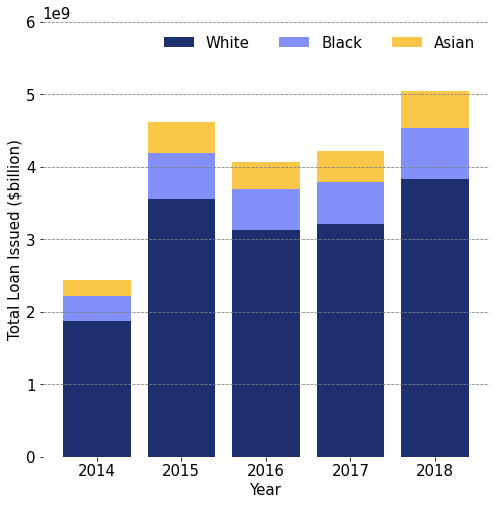

In [295]:
fields = ['white_loan_amnt','black_loan_amnt','asian_loan_amnt']
colors = ['#1D2F6F', '#8390FA', '#FAC748']
labels = ['White', 'Black', 'Asian' ]

# figure and axis
fig, ax = plt.subplots(1, figsize=(8, 8))
# plot bars
bottom = len(df_plot) * [0]
for idx, name in enumerate(fields):
    plt.bar(df_plot.index, df_plot[name], bottom=bottom, color=colors[idx])
    bottom = bottom + df_plot[name]

# title, legend, labels
#plt.title('Total Issued Loans($) by Race\n', loc='center', fontsize = 15)
plt.legend(labels, ncol=3, loc= 'best', frameon=False, fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Loan Issued ($billion)', fontsize = 15)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim(0, ax.get_yticks()[-1] + 0.5)
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.rcParams.update({'font.size': 15})
plt.show()

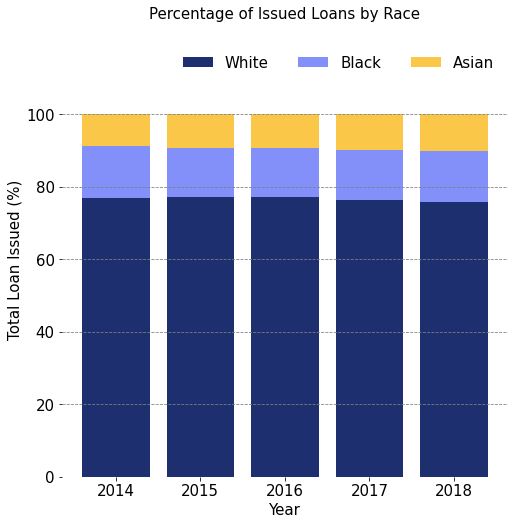

In [250]:
df_plot['total loan amt'] = df_plot['white_loan_amnt'] + df_plot['black_loan_amnt'] + df_plot['asian_loan_amnt']

for race in races:
    df_plot[race+'_perc'] = df_plot[race+'_loan_amnt']*100/df_plot['total loan amt']

fields = ['white_perc','black_perc','asian_perc']
colors = ['#1D2F6F', '#8390FA', '#FAC748']
labels = ['White', 'Black', 'Asian' ]

# figure and axis
fig, ax = plt.subplots(1, figsize=(8, 8))
# plot bars
bottom = len(df_plot) * [0]
for idx, name in enumerate(fields):
    plt.bar(df_plot.index, df_plot[name], bottom=bottom, color=colors[idx])
    bottom = bottom + df_plot[name]

# title, legend, labels
plt.title('Percentage of Issued Loans by Race\n', loc='center', fontsize = 15)
plt.legend(labels, ncol=3, loc= 'best', frameon=False, fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Loan Issued (%)', fontsize = 15)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim(0, ax.get_yticks()[-1] - 0.1)
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.rcParams.update({'font.size': 15})
plt.show()

In [126]:
df_plot.columns

Index(['black_pop', 'white_pop', 'asian_pop', 'black_loan_amnt',
       'white_loan_amnt', 'asian_loan_amnt', 'year', 'black_loan_amnt_avg',
       'white_loan_amnt_avg', 'asian_loan_amnt_avg'],
      dtype='object')

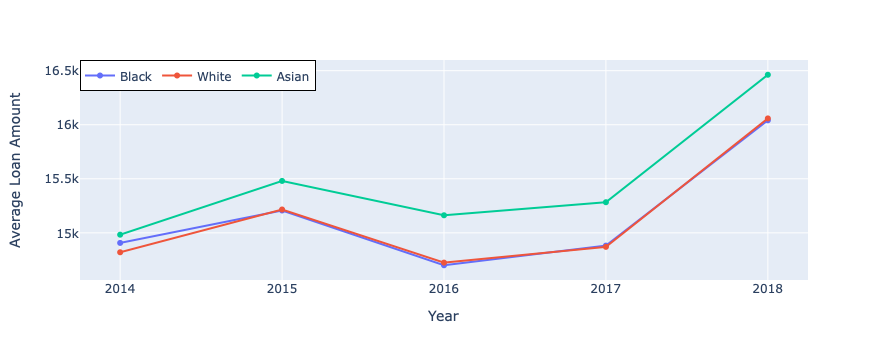

In [290]:
for race in races:
    df_plot[race.capitalize()] = df_plot[ race+'_loan_amnt_avg']
    
df_plot['year'] = df_plot['year'].astype(str)

fig = px.line(        
        df_plot.rename({'black_loan_amnt_avg':'black', 'white_loan_amnt_avg':'white', 'asian_loan_amnt_avg':'asian'}), #Data Frame
        x = 'year', #Columns from the data frame
        y = df_plot.columns[-3:],
#        title = "Average Loan Amount by Race",
        markers = True,
        labels = { 'year':'Year', 'value': 'Average Loan Amount',}
)

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        title = '',
        bordercolor="Black",
        borderwidth=1,
        orientation = 'h'
    )
)


fig.show()

In [191]:
#Rejected Dataset
#read data
df_rej = pd.read_pickle('Lending_Club_Rejected_2014_2018.pickle')
df_rej['Application_Date'] = pd.to_datetime(df_rej['Application_Date'])
df_rej['year'] = pd.DatetimeIndex(df_rej['Application_Date']).year
df_rej['Zip_Code'] = df_rej['Zip_Code'].map(lambda x: str(x).rstrip('xxx'))
df_rej.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt_to_Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code,year
0,1000.0,2016-04-01,other,NaN,2.69%,331,FL,< 1 year,0.0,2016
1,4000.0,2016-04-01,debt_consolidation,NaN,28.26%,834,ID,< 1 year,0.0,2016
2,5000.0,2016-04-01,moving,NaN,-1%,648,MO,NaN,0.0,2016
3,1000.0,2016-04-01,moving,628.0,21.43%,380,TN,< 1 year,0.0,2016
4,3000.0,2016-04-01,Debt consolidation,NaN,8.49%,895,NV,2 years,2.0,2016


In [192]:
df_rej = df_rej.groupby(['year', 'Zip_Code']).agg({'Loan_Title':'count', 'year':'first', 'Zip_Code':'first'})
df_rej.head()

Loan_Title  year Zip_Code
year Zip_Code                           
2014 000               49  2014      000
     001               17  2014      001
     002               28  2014      002
     003                4  2014      003
     004                3  2014      004

In [193]:
df_rej['Rejected']= df_rej['Loan_Title']
df_rej = df_rej[['year', 'Zip_Code', 'Rejected']]

In [194]:
df_rej.head()

year Zip_Code  Rejected
year Zip_Code                         
2014 000       2014      000        49
     001       2014      001        17
     002       2014      002        28
     003       2014      003         4
     004       2014      004         3

In [199]:
df_agrp = df_acp.groupby(['year', 'Zip_Code']).agg({'purpose':'count', 'year':'first', 'Zip_Code':'first'})
df_agrp['Accepted'] = df_agrp['purpose']
df_agrp = df_agrp[['year', 'Zip_Code', 'Accepted']]
df_agrp.head()

year Zip_Code  Accepted
year Zip_Code                         
2014 007       2014      007         2
     008       2014      008         1
     010       2014      010       379
     011       2014      011       115
     012       2014      012        93

In [219]:
df_total = pd.concat([df_agrp, df_rej], axis=0)
df_total.tail()

year Zip_Code  Accepted  Rejected
year Zip_Code                                   
2018 995       2018      995       NaN    9107.0
     996       2018      996       NaN    4650.0
     997       2018      997       NaN    3635.0
     998       2018      998       NaN    1158.0
     999       2018      999       NaN     472.0

In [220]:
df_total.reset_index(drop=True, inplace=True)
df_total = pd.merge(df_total, df_demo, how = 'inner', on = ['year', 'Zip_Code'])
df_total.head()

,year,Zip_Code,Accepted,Rejected,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,population
0,2014,100,1912.0,NaN,2014,NY,100.0,76594.449713,0.189891,0.153005,0.639344,0.571839,4741269
1,2014,100,NaN,11385.0,2014,NY,100.0,76594.449713,0.189891,0.153005,0.639344,0.571839,4741269
2,2014,101,74.0,NaN,2014,NY,101.0,76594.449713,0.189891,0.153005,0.639344,0.571839,273228
3,2014,101,NaN,441.0,2014,NY,101.0,76594.449713,0.189891,0.153005,0.639344,0.571839,273228
4,2014,102,15.0,NaN,2014,NY,102.0,76594.449713,0.189891,0.153005,0.639344,0.571839,239610


In [221]:
for race in races:
    df_total['acc_'+race] = df_total['is_'+race] * df_total['Accepted']
    df_total['rej_'+race] = df_total['is_'+race] * df_total['Rejected']
df_total.head()

,year,Zip_Code,Accepted,Rejected,YEAR,STATE,zip3,FAMINC,is_black,is_asian,is_white,is_college,population,acc_black,rej_black,acc_white,rej_white,acc_asian,rej_asian
0,2014,100,1912.0,NaN,2014,NY,100.0,76594.449713,0.189891,0.153005,0.639344,0.571839,4741269,363.071038,NaN,1222.426230,NaN,292.546448,NaN
1,2014,100,NaN,11385.0,2014,NY,100.0,76594.449713,0.189891,0.153005,0.639344,0.571839,4741269,NaN,2161.905738,NaN,7278.934426,NaN,1741.967213
2,2014,101,74.0,NaN,2014,NY,101.0,76594.449713,0.189891,0.153005,0.639344,0.571839,273228,14.051913,NaN,47.311475,NaN,11.322404,NaN
3,2014,101,NaN,441.0,2014,NY,101.0,76594.449713,0.189891,0.153005,0.639344,0.571839,273228,NaN,83.741803,NaN,281.950820,NaN,67.475410
4,2014,102,15.0,NaN,2014,NY,102.0,76594.449713,0.189891,0.153005,0.639344,0.571839,239610,2.848361,NaN,9.590164,NaN,2.295082,NaN


In [280]:
df_accr = df_total.groupby('year').agg({ 'year':'first', 'acc_black':sum, 'rej_black':sum,
                                        'acc_white':sum, 'rej_white':sum,
                                        'acc_asian':sum, 'rej_asian':sum})
for race in races:
    df_accr[race.capitalize()] = df_accr['acc_'+race]*100/(df_accr['acc_'+race] + df_accr['rej_'+race])
df_accr.reset_index(drop=True, inplace=True)
df_accr['year'] = df_accr['year'].astype(str)
df_accr.head()

,year,acc_black,rej_black,acc_white,rej_white,acc_asian,rej_asian,Black,White,Asian
0,2014,23279.636849,196601.511018,126398.564726,1.012380e+06,14283.425342,107019.605248,10.587373,11.099486,11.774995
1,2015,41103.965465,284635.094944,234158.370924,1.563034e+06,27521.224565,172139.246818,12.618679,13.029118,13.784013
2,2016,37834.697098,422784.154539,212883.741892,2.266400e+06,24746.938202,248012.980334,8.213884,8.586501,9.072791
3,2017,38955.901084,633563.980761,216254.127553,3.344774e+06,27334.400167,390315.623277,5.792528,6.072800,6.544810
4,2018,43949.723976,857101.598020,238737.116368,4.425610e+06,31135.745931,531178.471397,4.877605,5.118339,5.537073


In [301]:
df_accr['Total Acc'] = df_accr['acc_white']+df_accr['acc_black']+df_accr['acc_asian']
df_accr['Acceptance Rate'] = 100*df_accr['Total Acc']/(df_accr['Total Acc']+df_accr['rej_black'] +df_accr['rej_white']+df_accr['rej_asian'])
                            
df_accr.head()

,year,acc_black,rej_black,acc_white,rej_white,acc_asian,rej_asian,Black,White,Asian,Total Acc,Acceptance Rate
0,2014,23279.636849,196601.511018,126398.564726,1.012380e+06,14283.425342,107019.605248,219881.147868,1.138779e+06,121303.030591,163961.626918,11.078768
1,2015,41103.965465,284635.094944,234158.370924,1.563034e+06,27521.224565,172139.246818,325739.060409,1.797193e+06,199660.471383,302783.560954,13.036449
2,2016,37834.697098,422784.154539,212883.741892,2.266400e+06,24746.938202,248012.980334,460618.851637,2.479284e+06,272759.918536,275465.377192,8.574363
3,2017,38955.901084,633563.980761,216254.127553,3.344774e+06,27334.400167,390315.623277,672519.881845,3.561029e+06,417650.023444,282544.428804,6.074659
4,2018,43949.723976,857101.598020,238737.116368,4.425610e+06,31135.745931,531178.471397,901051.321996,4.664347e+06,562314.217328,313822.586276,5.121366


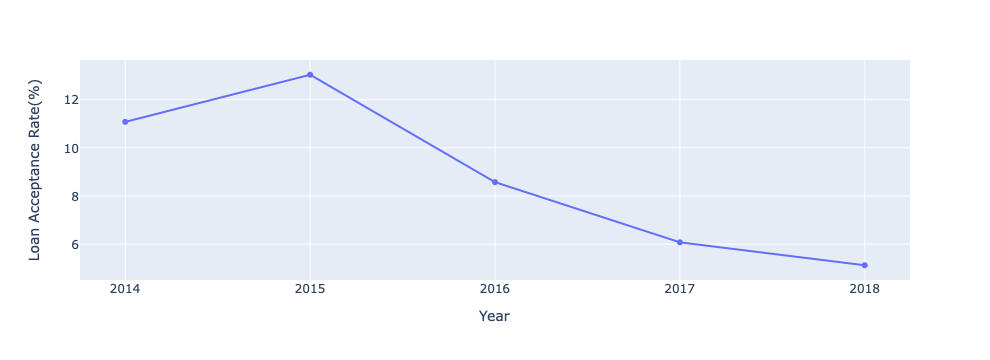

In [304]:
fig = px.line(        
        df_accr,
        x = 'year', #Columns from the data frame
        y = 'Acceptance Rate',
#        title = 'Loan Acceptance Rate by Race',
        markers = True,
        labels = { 'year':'Year', 'Acceptance Rate': 'Loan Acceptance Rate(%)',}
)

fig.show()

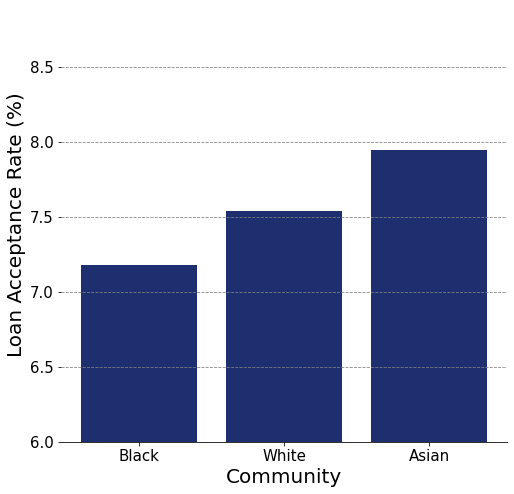

In [344]:
df_ar_avg = df_total.agg({ 'acc_black':sum, 'rej_black':sum,
                                        'acc_white':sum, 'rej_white':sum,
                                        'acc_asian':sum, 'rej_asian':sum})
df = pd.DataFrame([[0,0,0]], columns = [ 'Black', 'White', 'Asian'] )
for race in races:
    df[race.capitalize()] =df_ar_avg['acc_'+race] * 100/(df_ar_avg['acc_'+race] + df_ar_avg['rej_'+race])

df = df.T
#df['Acceptance Rate'] = df['0']
#df['Acceptance Rate'] = 

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.bar(df.index, df[0], color ='#1D2F6F' )
plt.xlabel('Community', fontsize = 20)
plt.ylabel('Loan Acceptance Rate (%)', fontsize = 20)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

plt.ylim(6, ax.get_yticks()[-1] - 0.1)
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.rcParams.update({'font.size': 15})
plt.show()

In [333]:
df.columns[0]

0

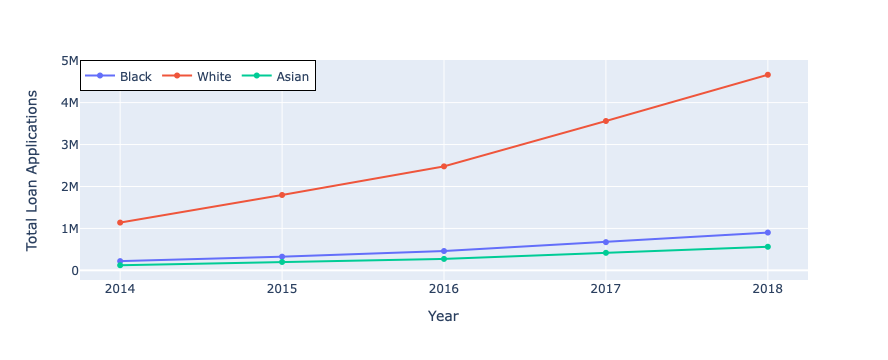

In [286]:
for race in races:
    df_accr[race.capitalize()] =df_accr['acc_'+race] + df_accr['rej_'+race]
    
fig = px.line(        
        df_accr,
        x = 'year', #Columns from the data frame
        y = df_accr.columns[-3:],
        markers = True,
        labels = { 'year':'Year', 'value': 'Total Loan Applications',
                 }
)

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        title = '',
#        bgcolor="LightBlue",
        bordercolor="Black",
        borderwidth=1,
        orientation = 'h'
    )
)

fig.show()

In [345]:
df_acp.head()

,id,loan_amnt,funded_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,issue_d,Zip_Code,addr_state,year,purpose,desc
0,68407277,3600.0,3600.0,13.99,C,C4,10+ years,55000.0,2015-12-01,190,PA,2015,debt_consolidation,NaN
1,68355089,24700.0,24700.0,11.99,C,C1,10+ years,65000.0,2015-12-01,577,SD,2015,small_business,NaN
2,68341763,20000.0,20000.0,10.78,B,B4,10+ years,63000.0,2015-12-01,605,IL,2015,home_improvement,NaN
3,66310712,35000.0,35000.0,14.85,C,C5,10+ years,110000.0,2015-12-01,076,NJ,2015,debt_consolidation,NaN
4,68476807,10400.0,10400.0,22.45,F,F1,3 years,104433.0,2015-12-01,174,PA,2015,major_purchase,NaN


In [405]:
df_acpdemo['loan_status'].unique()

array(['Fully Paid', 'In Grace Period', 'Charged Off', 'Current',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [355]:
zip_sum = df_acpdemo.groupby('Zip_Code').agg({'Zip_Code':'first', 'is_black':'mean'})
black_zips = zip_sum.nlargest(30,'is_black')['Zip_Code'].tolist()
black_zips

['206',
 '455',
 '708',
 '706',
 '302',
 '310',
 '311',
 '209',
 '236',
 '701',
 '202',
 '707',
 '235',
 '291',
 '354',
 '204',
 '205',
 '203',
 '720',
 '721',
 '722',
 '352',
 '351',
 '292',
 '303',
 '366',
 '290',
 '712',
 '714',
 '350']

In [379]:
#Get Muslim Zips
df_muslim = pd.read_csv('muslim_by_county_cleaned.csv')
muslim_zips = df_muslim.nlargest(30,'Percent')['zip3'].tolist()
muslim_zips = [str(round(x)) for x in muslim_zips]

In [437]:
df_dclass = df_acpdemo
df_dclass['Quarter'] = df_dclass['year'].astype(str).map(lambda x: x+'Q') + df_dclass['quarter'].astype(str)
df_dclass['Defaulted'] = df_dclass['loan_status'].map( lambda x: x in ['Charged Off', 'Default'])
df_dclass['Paid'] = df_dclass['loan_status'].map( lambda x: x == 'Fully Paid')
df_dclass['Total'] = df_dclass['Defaulted'] | df_dclass['Paid']
df_dclass['Black'] = df_dclass['Zip_Code'].map(lambda x: 'Black Neighbourhoods' if x in black_zips else 'Other')
df_dclass['Muslim'] = df_dclass['Zip_Code'].map(lambda x: 'Muslim Neighbourhoods' if x in muslim_zips else 'Other')

In [438]:
df_bl = df_dclass.groupby(['Quarter', 'Black']).agg({'int_rate':'mean', 'funded_amnt':'sum',
                                                    'Paid':'sum', 'Total':'sum', 'Quarter':'first',
                                                    'Black':'first', 'Quarter':'first'})
df_bl['Default Rate'] = 100 - df_bl['Paid']*100/df_bl['Total']
df_bl.head()

int_rate  funded_amnt   Paid  Total Quarter  \
Quarter Black                                                                
2014Q1  Black Neighbourhoods  14.583684   19920625.0   1062   1291  2014Q1   
        Other                 14.342604  487096550.0  27056  32421  2014Q1   
2014Q2  Black Neighbourhoods  14.191239   22726500.0   1117   1411  2014Q2   
        Other                 14.094436  562630775.0  29598  36337  2014Q2   
2014Q3  Black Neighbourhoods  14.007122   25879550.0   1297   1605  2014Q3   

                                             Black  Default Rate  
Quarter Black                                                     
2014Q1  Black Neighbourhoods  Black Neighbourhoods     17.738187  
        Other                                Other     16.547916  
2014Q2  Black Neighbourhoods  Black Neighbourhoods     20.836286  
        Other                                Other     18.545835  
2014Q3  Black Neighbourhoods  Black Neighbourhoods     19.190031

In [502]:
df_bl['funded_amnt'] = df_bl['funded_amnt']/1e6
Black_int = pd.crosstab(df_bl['Quarter'], df_bl['Black'], df_bl['int_rate'], aggfunc = 'mean',)# colnames=['Loan Interest rate(%)'])
Black_fund = pd.crosstab(df_bl['Quarter'], df_bl['Black'], df_bl['funded_amnt'], aggfunc = 'sum',)# colnames=['Loan Interest rate(%)'])
Black_def = pd.crosstab(df_bl['Quarter'], df_bl['Black'], df_bl['Default Rate'], aggfunc = 'mean',)# colnames=['Loan Interest rate(%)'])

In [477]:
Black_int.index

Index(['2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3',
       '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
       '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4'],
      dtype='object', name='Quarter')

In [471]:
pd.merge

Black,Black Neighbourhoods,Other,Quarter
Quarter,,,
2014Q1,17.738187,16.547916,2014Q1
2014Q2,20.836286,18.545835,2014Q2
2014Q3,19.190031,18.839332,2014Q3
2014Q4,19.672131,19.489194,2014Q4
2015Q1,21.379625,20.184226,2015Q1


In [503]:
df_new = pd.merge(Black_fund, Black_def, left_index=True, right_index=True)

In [504]:
print(df_new.round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
Black &  Black Neighbourhoods\_x &  Other\_x &  Black Neighbourhoods\_y &  Other\_y \\
Quarter &                         &          &                         &          \\
\midrule
2014Q1  &                   19.92 &   487.10 &                   17.74 &    16.55 \\
2014Q2  &                   22.73 &   562.63 &                   20.84 &    18.55 \\
2014Q3  &                   25.88 &   603.27 &                   19.19 &    18.84 \\
2014Q4  &                   30.91 &   766.04 &                   19.67 &    19.49 \\
2015Q1  &                   37.99 &   933.77 &                   21.38 &    20.18 \\
2015Q2  &                   43.95 &  1039.63 &                   21.54 &    20.64 \\
2015Q3  &                   52.23 &  1218.63 &                   21.07 &    20.24 \\
2015Q4  &                   57.26 &  1413.67 &                   21.06 &    19.84 \\
2016Q1  &                   36.38 &  1331.10 &                   20.77 &    20.38 \\
2016Q2  &             

/var/folders/zx/f9brkgk91s7cwmn105cp0sv80000gn/T/ipykernel_38010/1894316866.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [488]:
df_ml = df_dclass.groupby(['Quarter', 'Muslim']).agg({'int_rate':'mean', 'funded_amnt':'sum',
                                                    'Paid':'sum', 'Total':'sum', 'Quarter':'first',
                                                    'Muslim':'first', 'Quarter':'first'})
df_ml['Default Rate'] = 100 - df_ml['Paid']*100/df_ml['Total']
df_ml.head()

int_rate  funded_amnt   Paid  Total Quarter  \
Quarter Muslim                                                                
2014Q1  Muslim Neighbourhoods  14.605918   11966425.0    589    731  2014Q1   
        Other                  14.346230  495050750.0  27529  32981  2014Q1   
2014Q2  Muslim Neighbourhoods  14.331470   14634050.0    718    872  2014Q2   
        Other                  14.092487  570723225.0  29997  36876  2014Q2   
2014Q3  Muslim Neighbourhoods  13.676709   13942500.0    667    813  2014Q3   

                                              Muslim  Default Rate  
Quarter Muslim                                                      
2014Q1  Muslim Neighbourhoods  Muslim Neighbourhoods     19.425445  
        Other                                  Other     16.530730  
2014Q2  Muslim Neighbourhoods  Muslim Neighbourhoods     17.660550  
        Other                                  Other     18.654409  
2014Q3  Muslim Neighbourhoods  Muslim Neighbourhoods     17.958180

In [498]:
df_ml['funded_amnt'] =df_ml['funded_amnt']/1e6
Muslim_fund = pd.crosstab(df_ml['Quarter'], df_ml['Muslim'], df_ml['funded_amnt'], aggfunc = 'sum',)# colnames=['Loan Interest rate(%)'])
Muslim_def = pd.crosstab(df_ml['Quarter'], df_ml['Muslim'], df_ml['Default Rate'], aggfunc = 'mean',)# colnames=['Loan Interest rate(%)'])

In [499]:
df_new = pd.merge(Muslim_fund, Muslim_def, left_index=True, right_index=True)

In [501]:
print(df_new.round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
Muslim &  Muslim Neighbourhoods\_x &  Other\_x &  Muslim Neighbourhoods\_y &  Other\_y \\
Quarter &                          &          &                          &          \\
\midrule
2014Q1  &                    11.97 &   495.05 &                    19.43 &    16.53 \\
2014Q2  &                    14.63 &   570.72 &                    17.66 &    18.65 \\
2014Q3  &                    13.94 &   615.21 &                    17.96 &    18.87 \\
2014Q4  &                    18.14 &   778.81 &                    21.24 &    19.46 \\
2015Q1  &                    25.59 &   946.17 &                    20.58 &    20.22 \\
2015Q2  &                    30.45 &  1053.12 &                    21.21 &    20.66 \\
2015Q3  &                    33.82 &  1237.04 &                    19.82 &    20.28 \\
2015Q4  &                    39.95 &  1430.98 &                    19.54 &    19.90 \\
2016Q1  &                    42.15 &  1325.33 &                    20.89 &    20.37 \\

/var/folders/zx/f9brkgk91s7cwmn105cp0sv80000gn/T/ipykernel_38010/1894316866.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.

